# Stack Exchange Tag Recommendation 

# Importing Libraries

In [12]:
import json 
import requests
import networkx as nx
import matplotlib.pyplot as plt
import itertools

## Extracting data through API call 

In [7]:

json_list = []

def extract_raw_json():
    
    global json_list
    # make requests for 100 pages of size 100 records each 
    for i in range(1,101):
        url = f'https://api.stackexchange.com/2.2/questions?page={i}&pagesize=100&order=desc&sort=activity&site=datascience&key=4*MX83rbQ8xfUvuY*49ZKw(('
        data = requests.get(url)
        questions_api = data.json()
        json_list.append(questions_api)
    
    #Save the list of extracted records in a json file
    with open('stackExchangeAPI.json', 'w+') as f:
        json.dump(json_list, f, indent=4)
    

## Extracting and storing Tags from records

In [8]:

def store_tags():
    #Read each page and record in the file and extract only the tags
    with open('stackExchangeAPI.json','r') as json_file:
        tags_list = []
        data = json.load(json_file)
        for i in range(0,99): #Loop through 100 pages
            for j in range(0,99): # Loop through 100 records in each page
              tags = data[i]["items"][j]["tags"]
              with open('tags.txt','a+') as tags_file: 
                    tags_file.seek(0)
                    d = tags_file.read()
                    #If file contains data , add the record in a newline
                    if len(d) > 0 :
                        tags_file.write("\n")
                    out = ','.join(f'{tags[i]}' for i in range(0,(len(tags))))
                    tags_file.write(out)

In [9]:
#Get list of Unique Tags from tags.txt

unique_tags = []

def extract_unique_tags():
    
    global unique_tags
    fp  = open('tags.txt')
    #Read each line , extract tags split by a comma 
    tags = [word.strip() for line in fp.readlines() for word in line.split(',') if word.strip()]

    print(" Total number of tags : " , len(tags))
    unique_tags = set(tags)   # Find the unique tags
    print(" Number of Unique tags : " , len(unique_tags))


## Build a Weighted graph of Tags

In [13]:
#Create an empty graph with no vertices
G = nx.Graph()


def create_nodes():
    global G
    #Create nodes for G 
    for tag in unique_tags:
        G.add_node(tag)
    


def draw_edges():
    global G
    related_tags_in_record = []
    
    fp  = open('tags.txt')
    lines = fp.readlines()

    for line in lines:
            line.strip()
            related_tags_in_record.clear()
            related_tags_in_record.append(line.split(','))
            related_tags_in_record[0] = [e.replace('\n','')for e in related_tags_in_record[0]]
        
            #Checking for edges in all possible pairs of tags in a record
            for i in range(len(related_tags_in_record[0])):
                for j in range(i+1,len(related_tags_in_record[0])):
                    if G.has_edge(related_tags_in_record[0][i],related_tags_in_record[0][j]):
                    # If edge is already present , increase the edge weight by one
                        G[related_tags_in_record[0][i]][related_tags_in_record[0][j]]['weight'] += 1
                    else:
                    # else , draw a new edge
                        G.add_edge(related_tags_in_record[0][i],related_tags_in_record[0][j], weight=1)

    edges_list = G.edges.data('weight', default=1)
    print(edges_list)
    nx.draw(G)

    #Pickling the graph 
    nx.write_gpickle(G,"tags_graph.pickle")
    plt.show()  
    nx.write_gexf(G, "test.gexf")



# Test Sample Query

In [14]:
#Query the neighbouring nodes(connected) of the query 

def sample_query(query_tag): 
    edges_of_query = G[query_tag]
    
    #Sort the edges based on edge weights
    neighbours = sorted(edges_of_query.items(), key=lambda edge: edge[1]['weight'],reverse=True)

    print(neighbours[:10])
    

In [25]:
#if __name__ == '__main__':
    #extract_raw_json()
    #store_tags()
    

In [29]:
print(json.dumps(json_list[0], indent=4))

{
    "items": [
        {
            "tags": [
                "data-mining",
                "clustering",
                "octave",
                "k-means",
                "categorical-data"
            ],
            "owner": {
                "reputation": 4692,
                "user_id": 97,
                "user_type": "registered",
                "accept_rate": 77,
                "profile_image": "https://www.gravatar.com/avatar/68acdc33e278ab19debf230662a7ad96?s=128&d=identicon&r=PG",
                "display_name": "IharS",
                "link": "https://datascience.stackexchange.com/users/97/ihars"
            },
            "is_answered": true,
            "view_count": 199793,
            "accepted_answer_id": 24,
            "answer_count": 13,
            "score": 156,
            "last_activity_date": 1596805219,
            "creation_date": 1400047101,
            "last_edit_date": 1402386828,
            "question_id": 22,
            "content_license": "CC BY

In [21]:
extract_unique_tags()

 Total number of tags :  61670
 Number of Unique tags :  587


In [32]:
print(list(unique_tags)[:15])

['scala', 'optimization', 'hana', 'nosql', 'mini-batch-gradient-descent', 'anonymization', 'annotation', 'overfitting', 'cost-function', 'regression', 'pooling', 'preprocessing', 'churn', 'naive-bayes-classifier', 'mlflow']


In [27]:
create_nodes()

print(G.nodes)

['scala', 'optimization', 'hana', 'nosql', 'mini-batch-gradient-descent', 'anonymization', 'annotation', 'overfitting', 'cost-function', 'regression', 'pooling', 'preprocessing', 'churn', 'naive-bayes-classifier', 'mlflow', 'bart', 'probabilistic-programming', 'data-wrangling', 'sap', 'code', 'lime', 'shap', 'softmax', 'faster-rcnn', 'sentiment-analysis', 'stata', 'apache-hadoop', 'distribution', 'ggplot2', 'pyro', 'metadata', 'historgram', 'transfer-learning', 'grid-search', 'c', 'activity-recognition', 'data.table', 'audio-recognition', 'dataset', 'groupby', 'knowledge-base', 'text-mining', 'ensemble-modeling', 'weka', 'infere', 'gaussian', 'windows', 'mean-shift', 'cuda', 'class-imbalance', 'multilabel-classification', 'market-basket-analysis', 'bayesian-networks', 'lasso', 'inception', 'online-learning', 'noise', 'experiments', '.net', 'esl', 'coursera', 'linear-algebra', 'data-leakage', 'vc-theory', 'sensors', 'rnn', 'movielens', 'missing-data', 'open-source', 'data-cleaning', 'th

[('scala', 'python', 8), ('scala', 'ipython', 4), ('scala', 'windows', 4), ('scala', 'apache-spark', 4), ('scala', 'machine-learning', 4), ('scala', 'neural-network', 4), ('scala', 'keras', 4), ('scala', 'java', 4), ('scala', 'pyspark', 2), ('optimization', 'machine-learning', 170), ('optimization', 'gradient-descent', 62), ('optimization', 'mini-batch-gradient-descent', 8), ('optimization', 'neural-network', 112), ('optimization', 'backpropagation', 16), ('optimization', 'python', 100), ('optimization', 'regression', 10), ('optimization', 'pandas', 6), ('optimization', 'scipy', 14), ('optimization', 'keras', 30), ('optimization', 'svm', 18), ('optimization', 'autoencoder', 4), ('optimization', 'activation-function', 8), ('optimization', 'deep-learning', 70), ('optimization', 'tensorflow', 22), ('optimization', 'parameter-estimation', 4), ('optimization', 'parameter', 4), ('optimization', 'training', 24), ('optimization', 'ranking', 4), ('optimization', 'classification', 20), ('optimiz

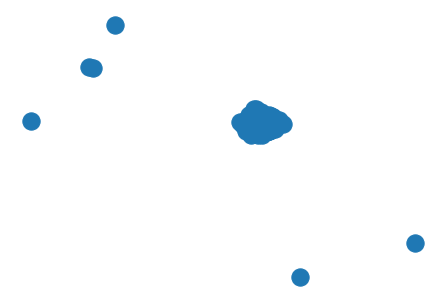

In [28]:
 draw_edges()

In [33]:
sample_query('machine-learning')

[('python', {'weight': 2186}), ('deep-learning', {'weight': 2160}), ('neural-network', {'weight': 1710}), ('classification', {'weight': 1162}), ('scikit-learn', {'weight': 872}), ('keras', {'weight': 820}), ('regression', {'weight': 612}), ('nlp', {'weight': 610}), ('tensorflow', {'weight': 606}), ('time-series', {'weight': 566})]
